# Title

## Load and Preview data

In [1]:
#! pip install ipykernel -U --force-reinstall
! pip install tensorflow

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Train data shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train data shape: (60000, 28, 28)
Train labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


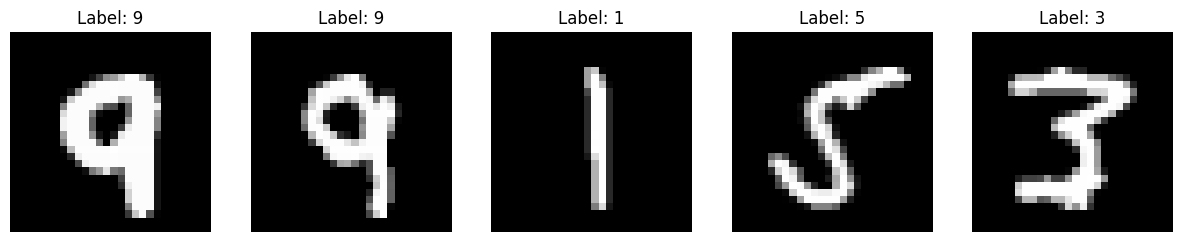

In [3]:
import random
import matplotlib.pyplot as plt

# Select 5 random indices
random_indices = random.sample(range(len(x_train)), 5)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Display the image
    ax.imshow(x_train[random_indices[i]], cmap='gray')

    # Set the title with the label
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Remove the axis labels
    ax.axis('off')

# Show the plot
plt.show()


## Preprocessing

In [21]:
import numpy as np

window_size = 5 # 5x5 window
step_size = 1   # 1 pixel step
window_images = []  

for image in x_train:
    height, width = image.shape
    window_image = []
    
    for i in range(0, height - window_size + 1, step_size):
        for j in range(0, width - window_size + 1, step_size):
            window = image[i:i+window_size, j:j+window_size]
            window_image.append(window)
    
    window_images.append(window_image)

window_images = np.array(window_images)


In [20]:
import numpy as np

window_size = 5 # 5x5 window
step_size = 1   # 1 pixel step
height, width = x_train[0].shape
num_windows = (int((width-window_size)/step_size)+1, int((height-window_size)/step_size)+1)
window_images = np.zeros((len(x_train), np.prod(num_windows), window_size, window_size), dtype=np.float32)


for k, image in enumerate(x_train):
    for i in range(0, height - window_size + 1, step_size):
        for j in range(0, width - window_size + 1, step_size):
            window_images[k, i*num_windows[0]+j] = image[i:i+window_size, j:j+window_size]

In [22]:
print(window_images.shape)

(60000, 576, 5, 5)


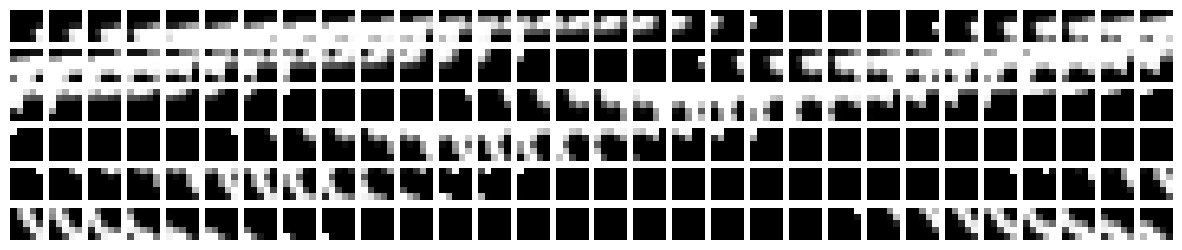

In [23]:
import matplotlib.pyplot as plt

offset = 100

fig, axes = plt.subplots(6, 30, figsize=(15, 3))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(window_images[0][i+offset], cmap='gray')
    ax.axis('off')

plt.show()


In [7]:
K = 100 # Number of clusters, range from 100 to 10000


Should I use the pixels as dimensions? (5*5 = 25)
or... maybe extract features? Eigenvectors? 
Can I use a library for finding the centroids?
Would I have a codebook (group of centroids) for every image? Maybe group up the codebooks by label